In [1]:
from common import *

In [2]:
# Choose position to filter down to
POSITION = "forwards"

# Load player historical season stats and salary cap data
hdf = load_historical_stats(POSITION)
hdf = hdf[hdf["season"] == "20242025"]
cdf = load_cap_data()

Join the two datasets on player name, which is not ideal but ok for now.

Also, I did not ingest cap data for all players (e.g. players on IR/LTIR).

And some players have names spelled differently across the two datasets, so they are not joined.

Filtering these cases out for now.

In [3]:
df = hdf.merge(cdf, on="playerName", how="left")
df = df[~df["capHit"].isna()]

Lets check the distribution of average time on ice.

Hypothesis: Players with low average time on ice (but strong scoring stats) are good breakout candidates.

In [19]:
# px.histogram(
#     df,
#     x="avgToi",
#     width=800,
#     height=500,
#     title="Distribution of Avg Time on Ice",
#     labels={"avgToi": "Avg Time on Ice"},
# )

Lets filter down to players with 1-2 years of experience in the NHL who played at least 10 games this past season. Looks like there are 36 players who fit the bill.

In [5]:
MIN_GAMES = 10
subset = df[
    (df["yoe"] <= 2)
    & (df["gamesPlayed"] >= MIN_GAMES)
    # & (df["avgToi"] <= 12)
    # & (df["age"] <= 25)
]
subset.shape

(36, 25)

Curious what goal/assist/point scoring rates are for these players vs their average ice time.

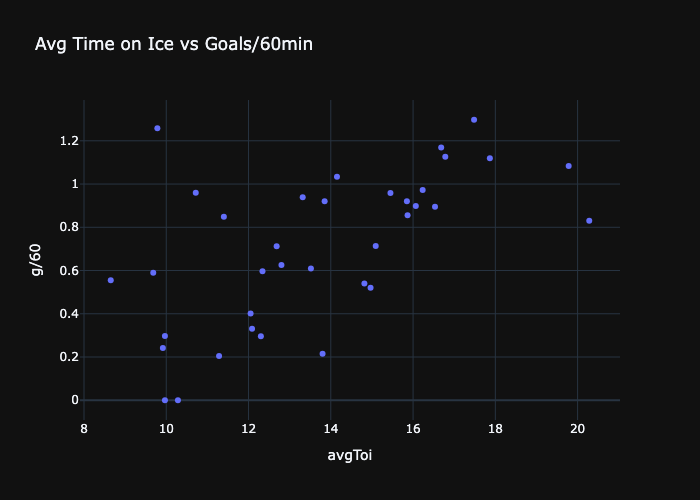

In [6]:
px.scatter(
    subset,
    x="avgToi",
    y="g/60",
    hover_name="playerName",
    hover_data=["goals", "assists", "points", "gamesPlayed", "team", "age", "capHit"],
    width=800,
    height=500,
    title="Avg Time on Ice vs Goals/60min",
)

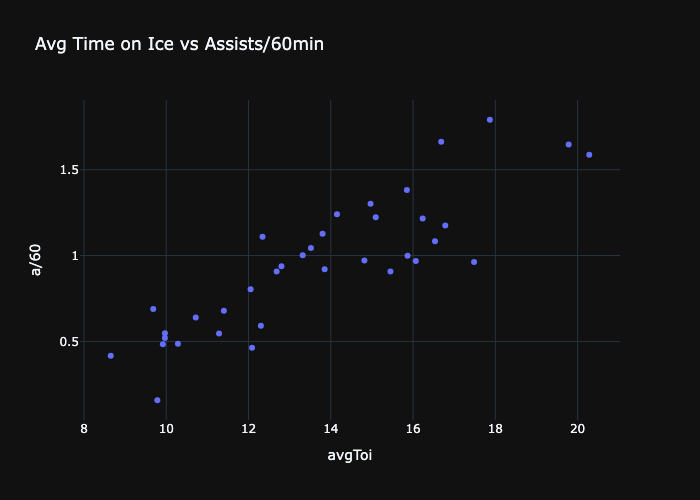

In [7]:
px.scatter(
    subset,
    x="avgToi",
    y="a/60",
    hover_name="playerName",
    hover_data=["goals", "assists", "points", "gamesPlayed", "team", "age", "capHit"],
    width=800,
    height=500,
    title="Avg Time on Ice vs Assists/60min",
)

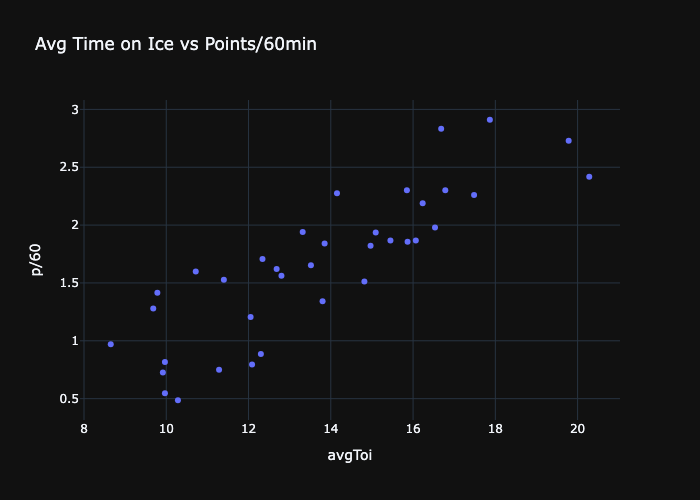

In [8]:
px.scatter(
    subset,
    x="avgToi",
    y="p/60",
    hover_name="playerName",
    hover_data=["goals", "assists", "points", "gamesPlayed", "team", "age", "capHit"],
    width=800,
    height=500,
    title="Avg Time on Ice vs Points/60min",
)

Just looking at goals/60 now, and split by years of experience.

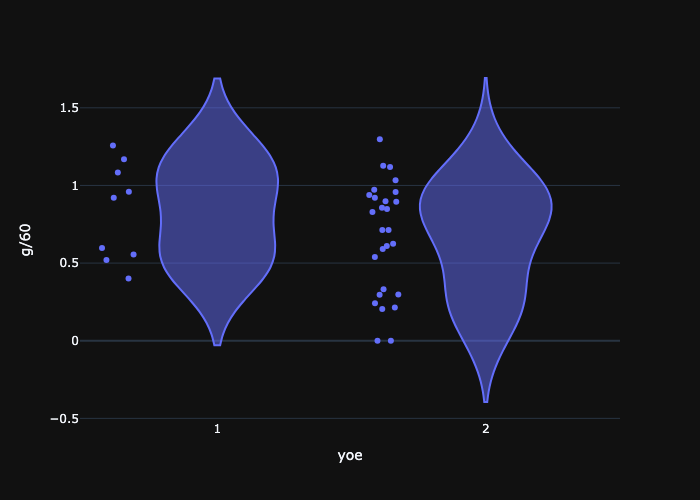

In [9]:
fig = px.violin(
    subset,
    x="yoe",
    y="g/60",
    points="all",
    hover_name="playerName",
    hover_data=["goals", "assists", "points", "gamesPlayed", "team", "age", "capHit"]
)
fig.show()

In [21]:
os.system("jupyter nbconvert --to html breakout-candidates.ipynb")

[NbConvertApp] Converting notebook breakout-candidates.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 495135 bytes to breakout-candidates.html


0